# Demographic Plots
This notebook is used to read the data from the pickle files and to create a dataframe with the demographic data.
With this data we can create plots to show the distribution of the demographic data.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import sys
import json

sys.path.append('../scripts')
import data_helper

## Load Data

In [2]:
data_demographic = data_helper.load_data(only_demographic=True)

df_dgc = pd.DataFrame(data_demographic)

# Change from group to category
age_categories = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df_dgc['age_group'] = pd.cut(df_dgc['age'], bins=age_categories)

Reading GSVT
Reading AFIB
Reading SR
Reading SB


## Plot Data

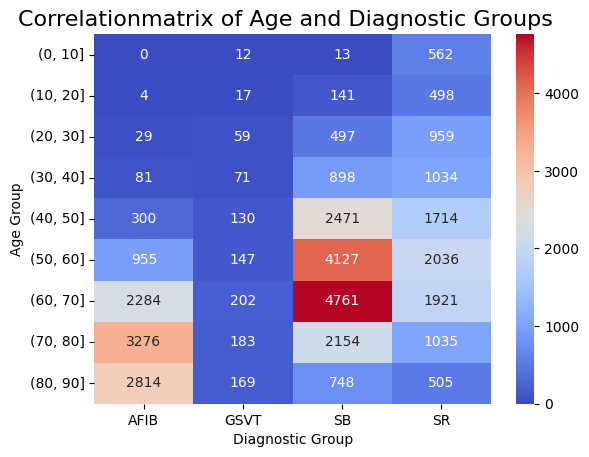

In [5]:
# Correlation matrix
corr_matrix_age_diag= pd.crosstab(df_dgc['age_group'], df_dgc['diag'])

# Plot the correlation matrix
sns.heatmap(corr_matrix_age_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Correlationmatrix of Age and Diagnostic Groups  ', fontsize=16)
plt.xlabel('Diagnostic Group')
plt.ylabel('Age Group')
plt.show()

## Chi-Square Statistc Test

With this test we want to check if there is a significant difference between the groups.

In [6]:

# Chi-square test
chi2, p, _, _ = chi2_contingency(corr_matrix_age_diag)

# Difference between observed and expected frequencies
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Check if SB (Sinusbradykardie) has a significantly higher frequency in the 60-70 age group
sb_60_70 = corr_matrix_age_diag.loc[pd.Interval(60, 70, closed='right'), 'SB']
sb_other = corr_matrix_age_diag.drop(pd.Interval(60, 70, closed='right')).sum()['SB']
total_60_70 = corr_matrix_age_diag.loc[pd.Interval(60, 70, closed='right')].sum()
total_other = corr_matrix_age_diag.drop(pd.Interval(60, 70, closed='right')).sum().sum()

# Frequency table for the specific Chi-Square test
observed = [[sb_60_70, total_60_70 - sb_60_70], [sb_other, total_other - sb_other]]
chi2_sb, p_sb = chi2_contingency(observed)[:2]


print(f"Chi-Square Statistic for SB in 60-70 vs others: {chi2_sb}")
print(f"P-value for SB in 60-70 vs others: {p_sb}")

Chi-Square Statistic: 11503.925605129169
P-value: 0.0
Chi-Square Statistic for SB in 60-70 vs others: 401.0271328859626
P-value for SB in 60-70 vs others: 3.291102770159182e-89


Correlation matrix of age groups and diagnoses.This matrix describes the four diagnosis groupings on the horizontal axis and the age groupings in decades steps on the vertical axis. The color scale blue (low) to red (high) describes the correlation of the two categorization types.

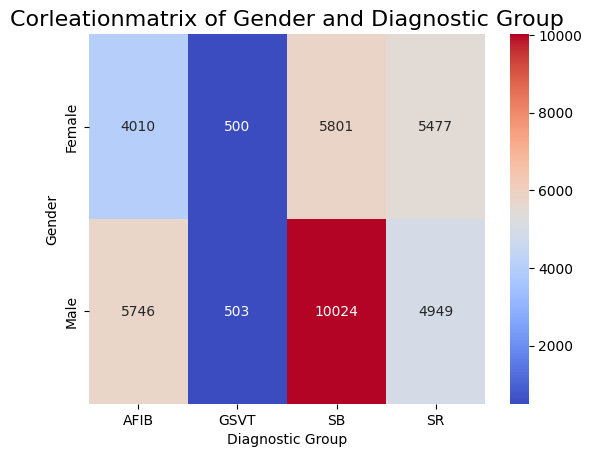

In [7]:
# cut out sex 'unknown' (because only one occurence)
df_dgc_bineary = df_dgc[df_dgc['gender'] != 'Unknown']
# Correlation matrix
corr_matrix_sex_diag = pd.crosstab(df_dgc_bineary['gender'], df_dgc_bineary['diag'])

# Plot the correlation matrix
sns.heatmap(corr_matrix_sex_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Corleationmatrix of Gender and Diagnostic Group', fontsize=16)
plt.xlabel('Diagnostic Group')
plt.ylabel('Gender')
plt.show()

Correlation matrix of genders and diagnoses. This matrix describes the four diagnosis groupings on the horizontal axis and the gender in decades steps on the vertical axis. The color scale blue (low) to red (high) describes the correlation of the two categorization types.

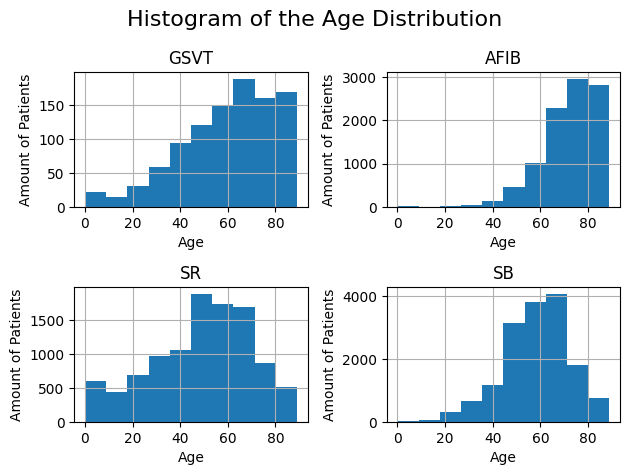

In [14]:
settings = json.load(open('../settings.json'))
categories_dict = settings['labels']
# 4 subplots for each diagnosis a histrgramm for the age
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histogram of the Age Distribution', fontsize=16)
for i, cat_name in enumerate(categories_dict.keys()):
    ax = axs[i // 2, i % 2]
    df_dgc[df_dgc['diag'] == cat_name]['age'].hist(ax=ax)
    ax.set_title(cat_name)
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount of Patients')
    # add some space between the subplots
plt.tight_layout()
plt.show()

Histogram of the age distribution. Breakdown of grouped diagnoses by age group and absolute incidence of diagnoses.

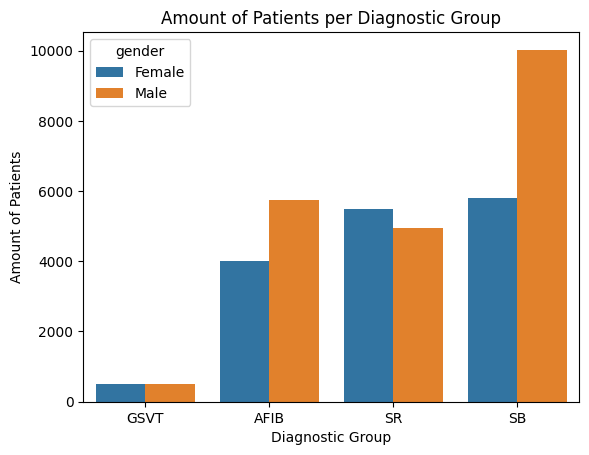

In [11]:
# a barplot for each category with the age grpuoped besides each other
fig, ax = plt.subplots()
sns.countplot(data=df_dgc_bineary, x='diag', hue='gender', ax=ax)
plt.title('Amount of Patients per Diagnostic Group')
plt.xlabel('Diagnostic Group')
plt.ylabel('Amount of Patients')
plt.show()

Barplot to visualize the distribution of diagnoses by gender. Where blue is female and orange is male.

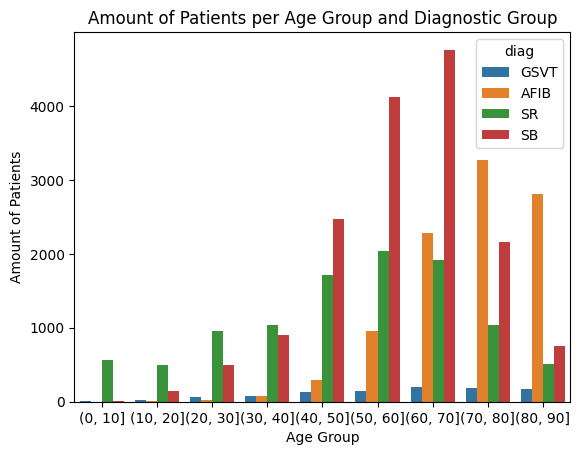

In [13]:
# barplot how many diagnosis are in each age group
fig, ax = plt.subplots()
sns.countplot(data=df_dgc, x='age_group', hue='diag', ax=ax)
plt.title('Amount of Patients per Age Group and Diagnostic Group')
plt.xlabel('Age Group')
plt.ylabel('Amount of Patients')
plt.show()

Barplot to show the distribution of diagnoses based on the age groupings. The difference in the incidence of the various diseases can be clearly seen here.